In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from src.experiment_utils import run_simulated_experiments

In [3]:
import warnings
warnings.filterwarnings("ignore")

# section 3

In [7]:
# num features experiment
features = [1., .8, .6, .4, .2]

In [5]:
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features]

res = run_simulated_experiments('vary_features', configs, n_reps=3)

Running forest experiment with seed 1, n_estimators 50, max features 1, bootstrap False and max_leaf_nodes 500.


Running forest experiment with seed 1, n_estimators 50, max features 0.8, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.6, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.4, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.2, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 1, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.8, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.6, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.4, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.2, bootstrap False 

Text(0.5, 1.0, 'MSE Test')

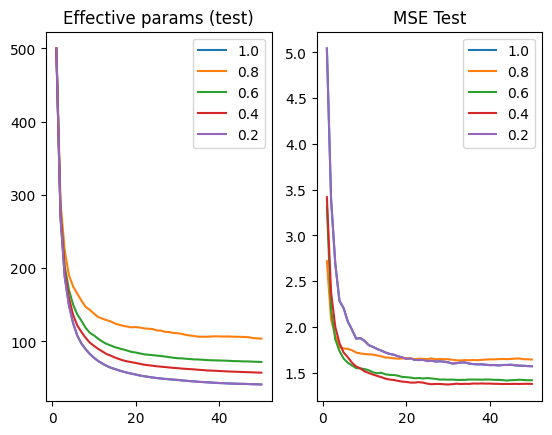

In [8]:
res_mean = res.groupby(['max_features', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()
plt.subplot(1, 2, 1)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{f}')
plt.legend()
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{f}')
plt.legend()
plt.title('MSE Test')

In [10]:
depths = [500, 200, 100, 50]

In [11]:
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':x, 'max_features': 1/3} for x in depths]

res = run_simulated_experiments('vary_depths', configs, n_reps=3)

Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.


Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 200.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 100.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 50.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 200.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 100.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 50.
Running forest experiment with seed 3, n_estimators 50, max features 0.3333333333333333, bootstrap 

Text(0.5, 1.0, 'MSE Test')

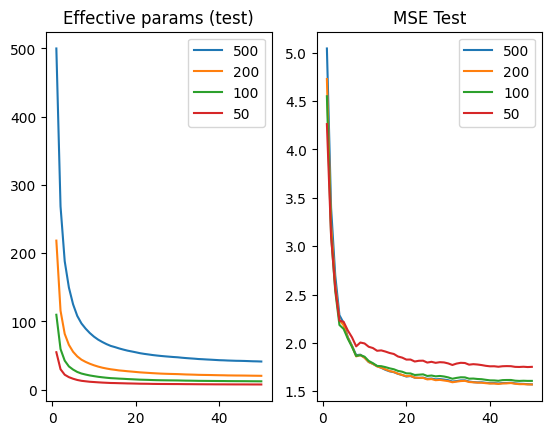

In [13]:
res_mean = res.groupby(['max_leaf_nodes', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()
plt.subplot(1, 2, 1)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{d}')
plt.legend()
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{d}')
plt.legend()
plt.title('MSE Test')

In [14]:
depths = [500, 50, 20, 2]

In [17]:
configs=[{ 'n_estimators': 500, 'max_leaf_nodes':x, 'learning_rate': .05} for x in depths]

res = run_simulated_experiments('vary_depths', configs, n_reps=3, boosting=True)

Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 500.


Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 50.
Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 20.
Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 2.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 500.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 50.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 20.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 2.
Running boosting experiment with seed 3, n_estimators 500, learning rate 0.05 and max_leaf_nodes 500.
Running boosting experiment with seed 3, n_estimators 500, learning rate 0.05 and max_leaf_nodes 50.
Running boosting experiment with seed 3, n_estimators 500, learning rate 0.05 and max_leaf_

Text(0.5, 1.0, 'MSE Test')

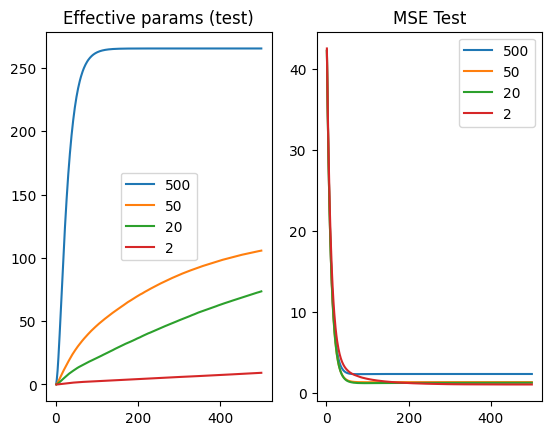

In [18]:
res_mean = res.groupby(['max_leaf_nodes', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()
plt.subplot(1, 2, 1)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{d}')
plt.legend()
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{d}')
plt.legend()
plt.title('MSE Test')